# kaggle credit card fraud practice 

https://www.kaggle.com/mlg-ulb/creditcardfraud

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## import lib and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import download csv from desktop
credit_df=pd.read_csv('../downloads/creditcard.csv')

In [4]:
credit_df.shape

(284807, 31)

In [5]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [7]:
print('Fraud Rate is {:.2%}'.format(credit_df[credit_df.Class==1].shape[0]/credit_df.shape[0]))

Fraud Rate is 0.17%


The dataset is unbalance, need to oversampling the positive class or undersampling the negative class before modeling

## EDA

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Total 30 features and 1 target variable, all the features are float type, no missing values for all the columns

In [9]:
#let's plot some charts to get some ideas of those features

/Users/julie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


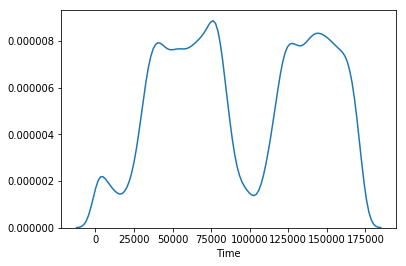

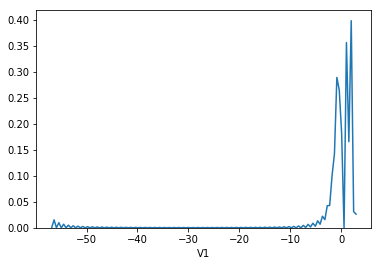

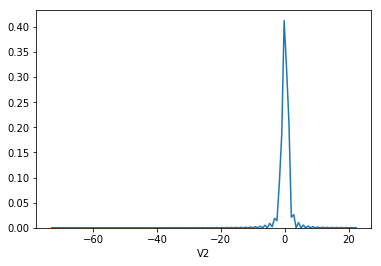

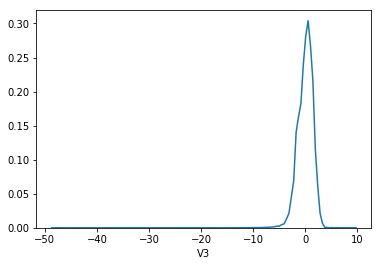

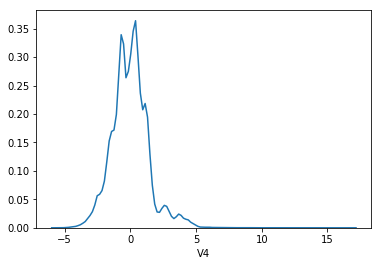

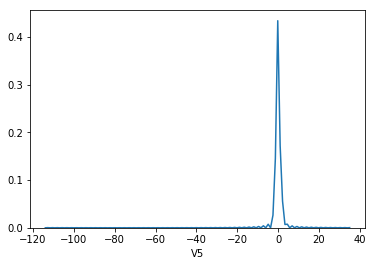

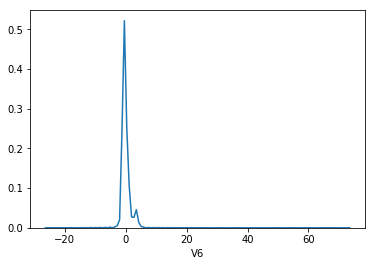

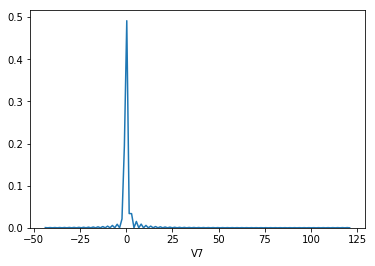

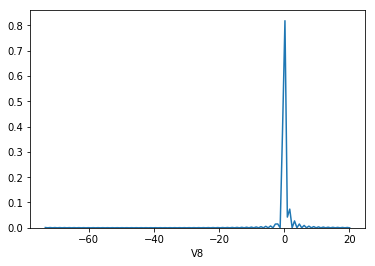

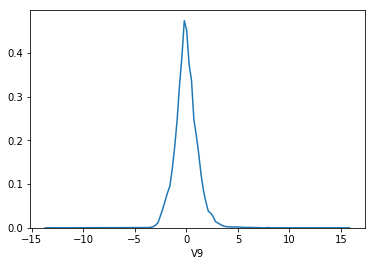

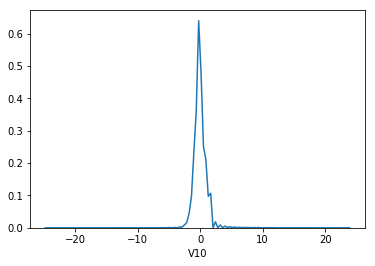

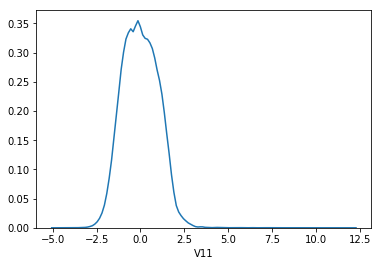

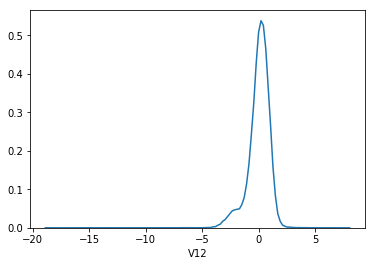

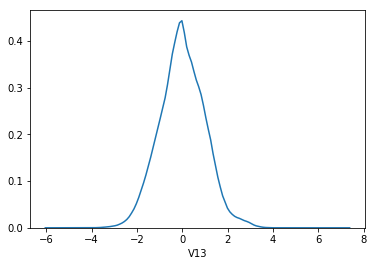

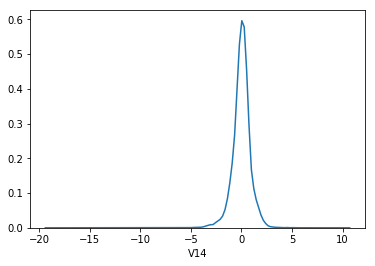

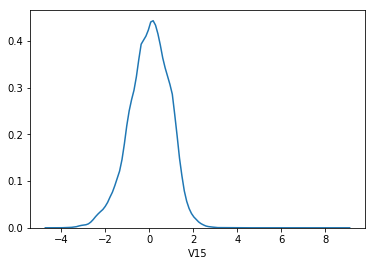

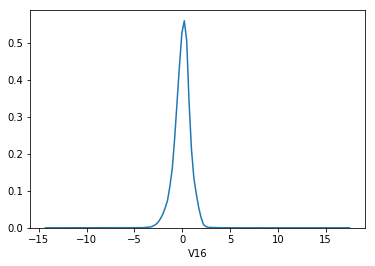

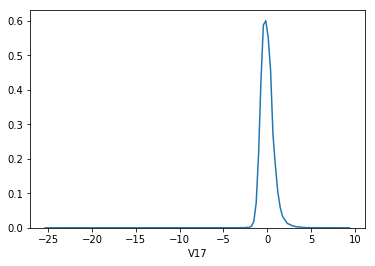

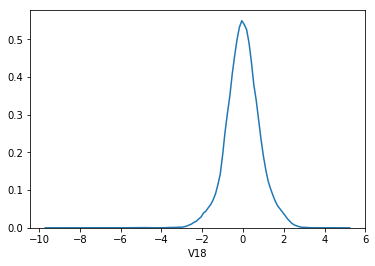

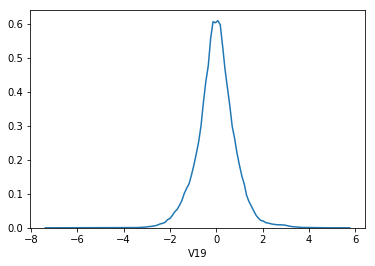

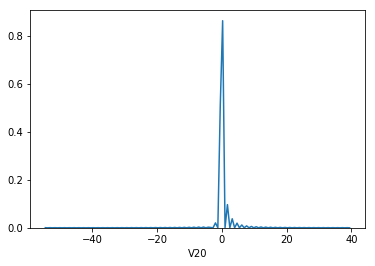

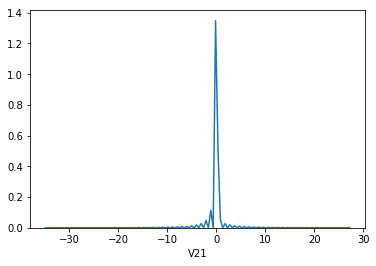

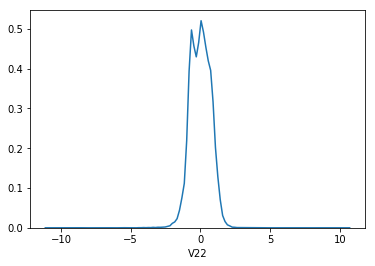

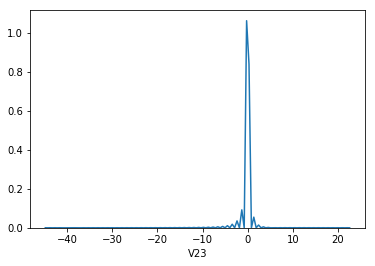

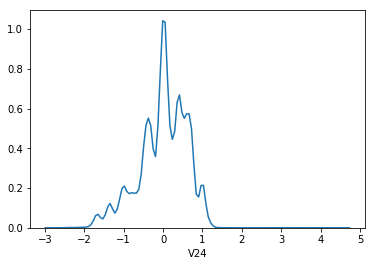

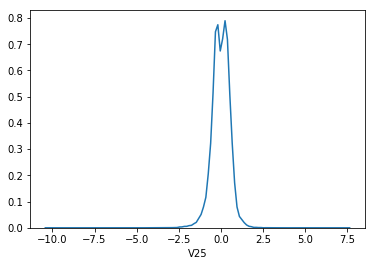

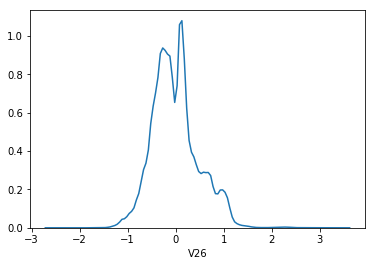

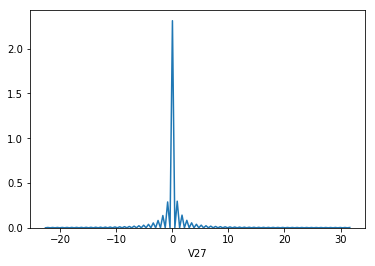

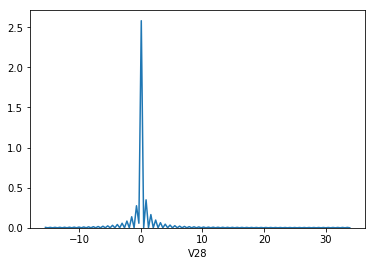

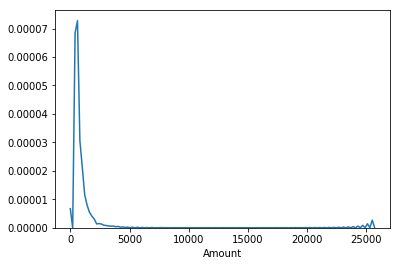

In [10]:
#extract those features and plot dist
for i in list(credit_df.drop('Class',axis=1).columns):
    sns.distplot(credit_df[i],hist=False)
    plt.show()

v1-v28 already did PCA and all features have normal distribution with mean equal 0

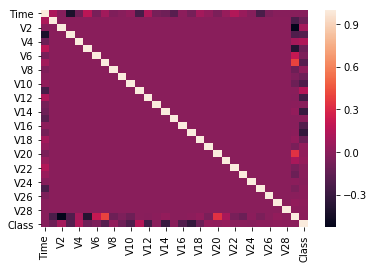

In [11]:
#plot heatmap 
sns.heatmap(credit_df.corr())

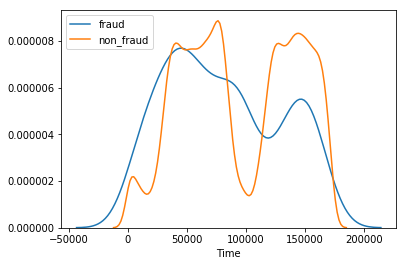

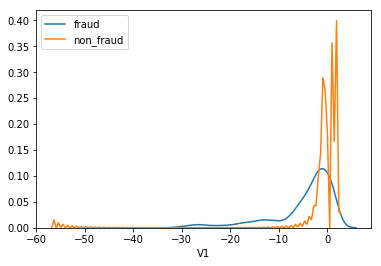

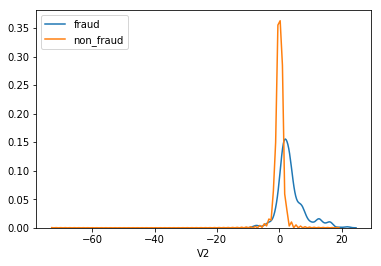

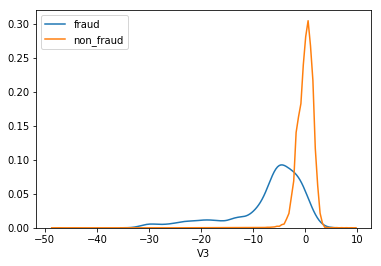

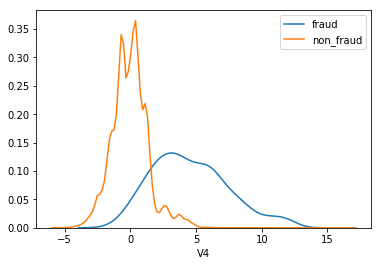

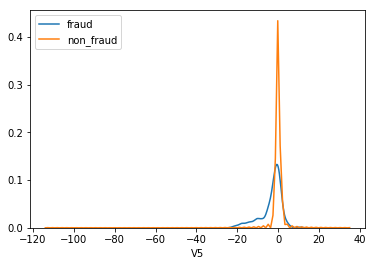

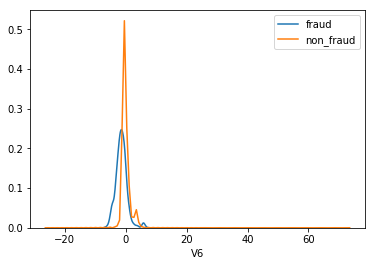

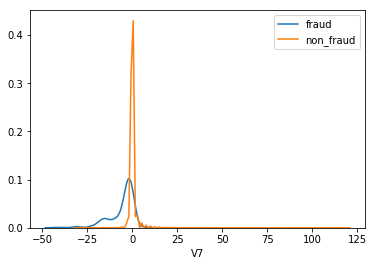

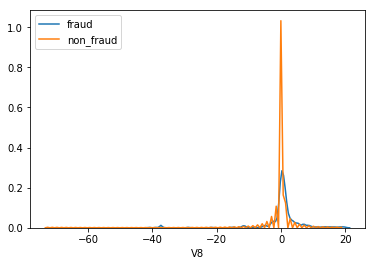

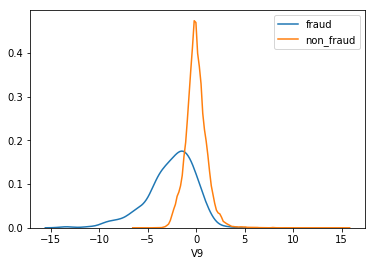

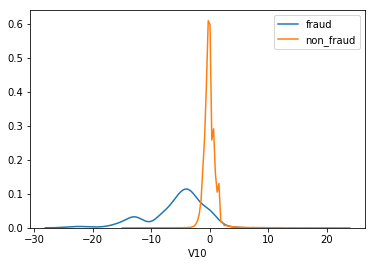

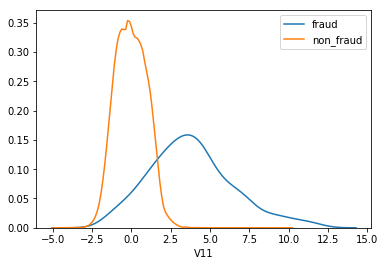

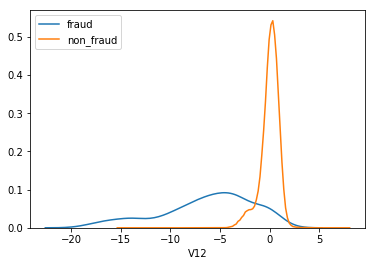

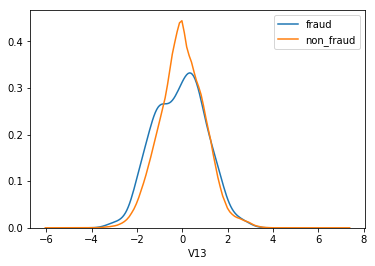

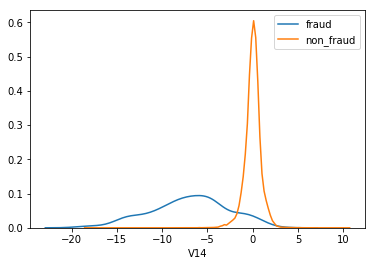

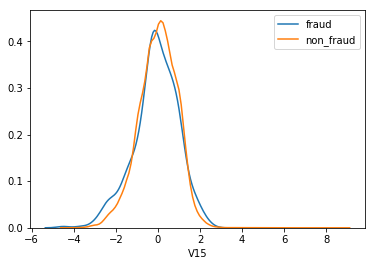

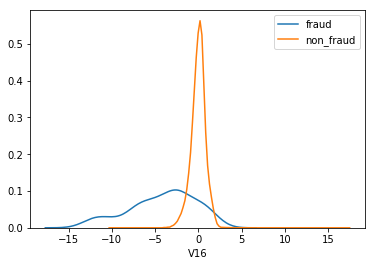

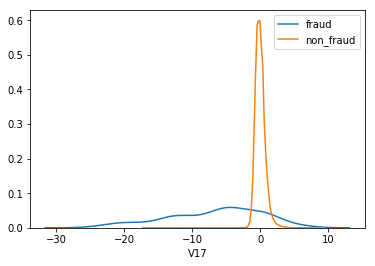

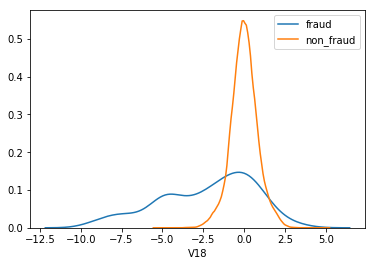

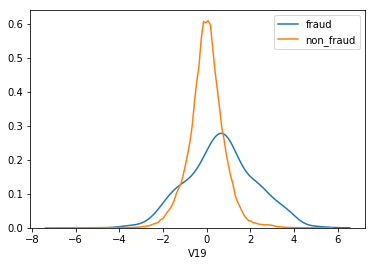

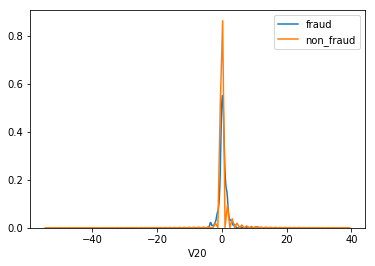

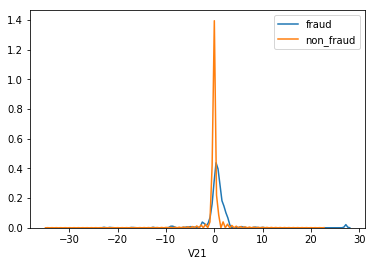

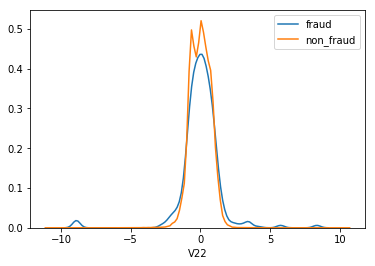

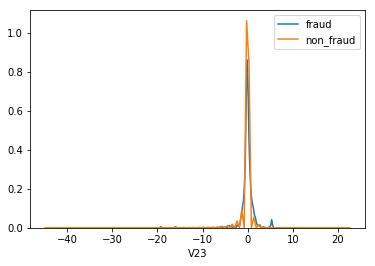

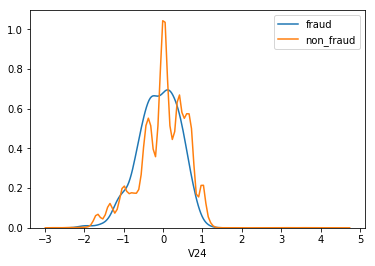

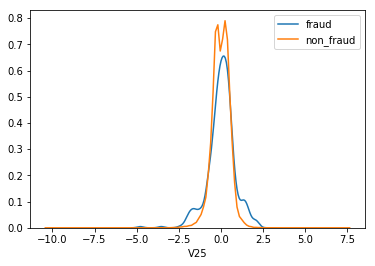

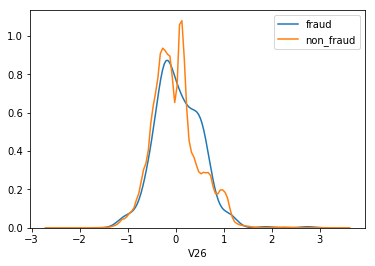

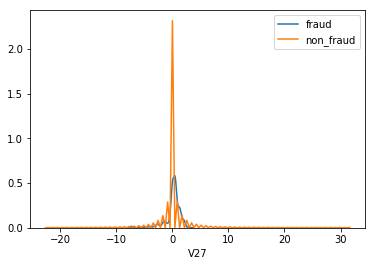

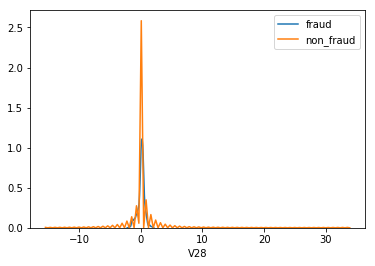

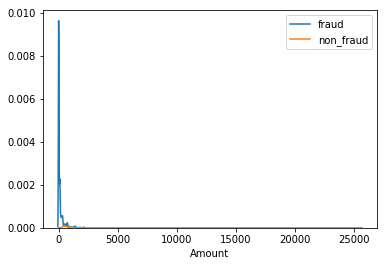

In [20]:
#have a look which features can better distingush fraud vs non fraud
for i in list(credit_df.drop('Class',axis=1).columns):
    sns.distplot(credit_df[credit_df.Class==1][i],hist=False,label='fraud')
    sns.distplot(credit_df[credit_df.Class==0][i],hist=False,label='non_fraud')
    plt.show()

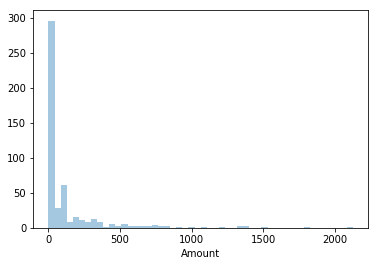

In [24]:
#most of fraud have relative low amount
sns.distplot(credit_df[credit_df.Class==1]['Amount'],kde=False,label='fraud')
plt.show()

-We can see some features can better distingush fraud/non_fraud such as v4,v11,v14 compared with others

-most fraud are relative small amounts less than 500, which is quite contrast with common stolen credit card fraud with HVT ( high value transactions ), for this case amount seems also an useful feature

## model preparation

Later will use logistic regression, random forest and xgboost 
for model training and select the best performing one for hyperparameter tuning, therefore below will split train-test set, do feature scaling, oversampling the positive class etc

### feature scaling
Use standard scaling here, for further optimization will also cross validation min max scaling